# Dimensionality Reduction Practice

We'll now have you work through practice problems using the dimensionality reduction techniques discussed in class.

We'll first work with the MNIST data set. Then we turn to a new data set with images of famous faces. The goal of this notebook is to get you familiar with the different techniques we've reviewed as well as introduce how they can be used for image based data. This is not to say that these techniques are the optimal approach for image based problems, but they can be useful.

## What You'll Accomplish

<ul>
    <li>You'll work through some problems with the MNIST data,</li>
    <li>Then you'll see how you can apply techniques to help with images of people.</li>
</ul>

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("white")

## MNIST Data

We return to the MNIST data set. Again attempt to load the dataset with the higher resolution images.

In [66]:
nums = pd.read_csv("https://raw.githubusercontent.com/cerndb/dist-keras/master/examples/data/mnist.csv")

X = np.array(nums.iloc[:,1:])
y = np.array(nums.iloc[:,0])



array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

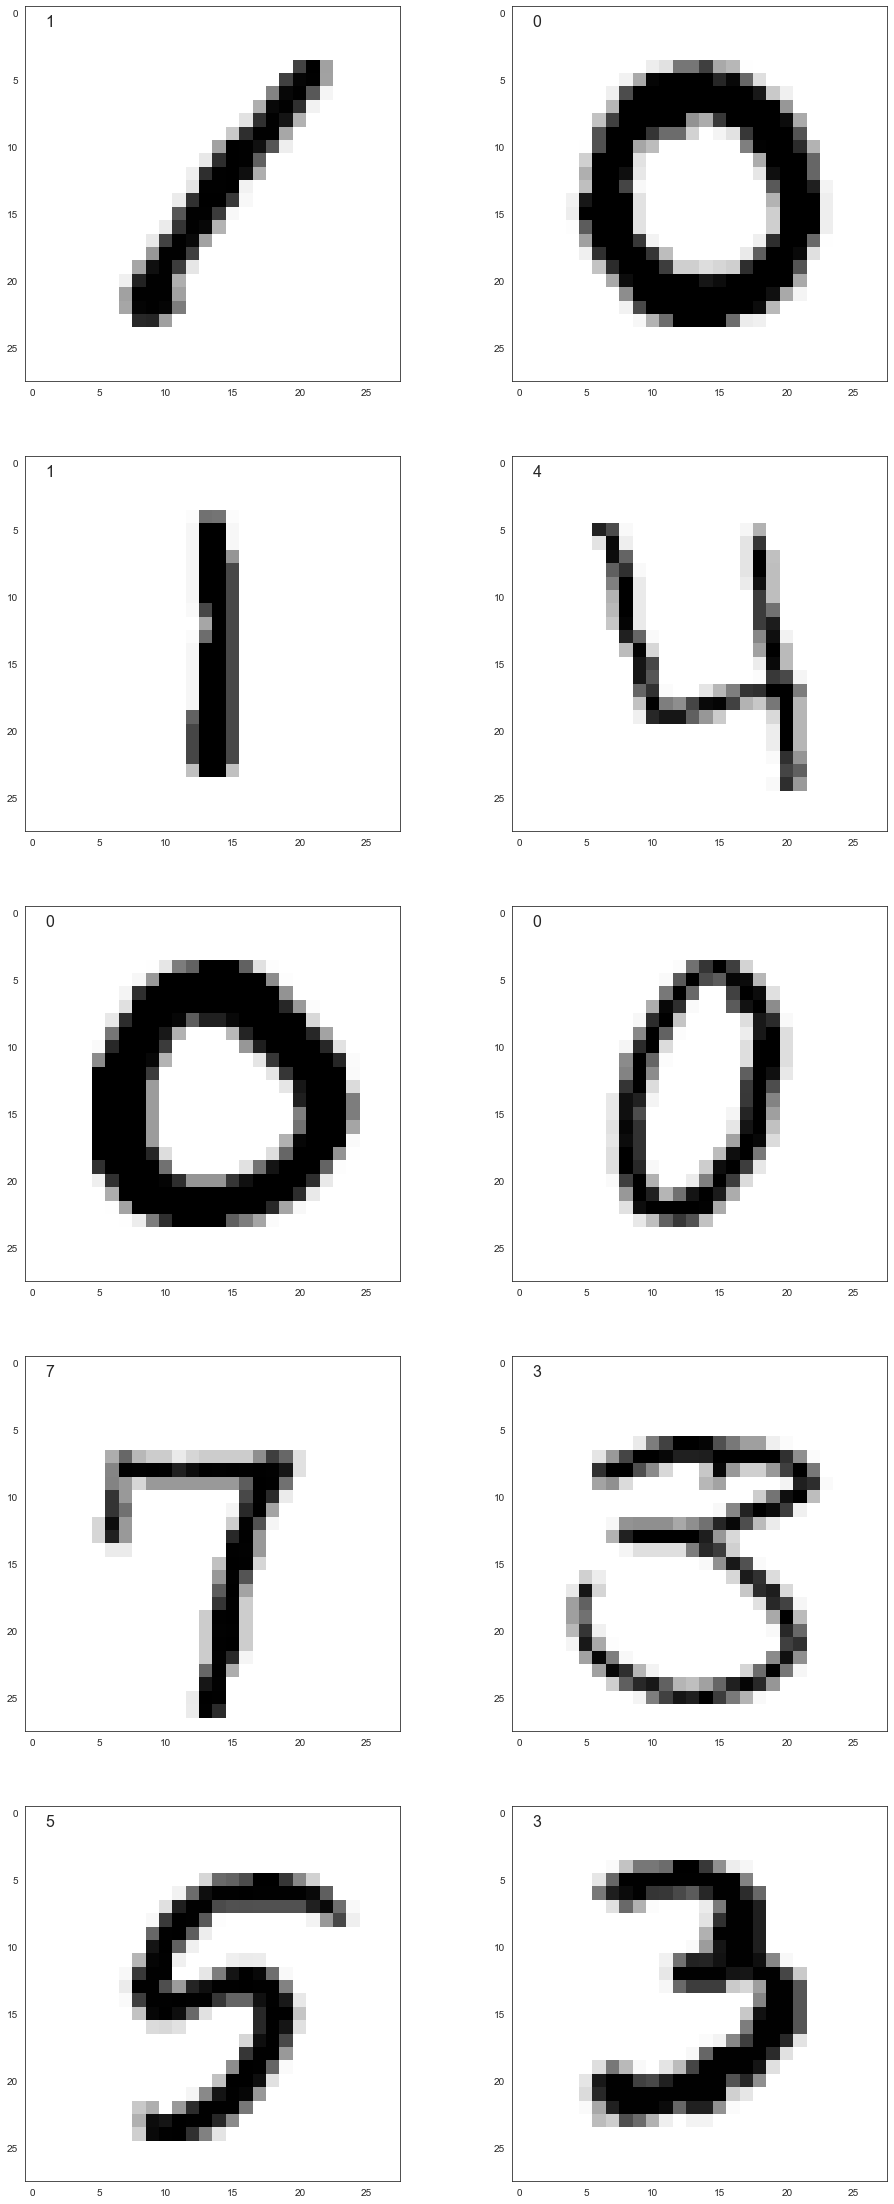

In [52]:
# Remember what the data looks like
fig,ax = plt.subplots(5,2,figsize=(16,40))

for i in range(10):
    ax[i//2,i%2].imshow(X[i,:].reshape(28, 28), cmap='gray_r')
    ax[i//2,i%2].text(1,1,str(y[i]),fontsize=16)

plt.show()

Now while these aren't super high resolution photos, $28\times28=784$ features is still a lot. It is thus desirable to reduce the data to look for patterns.

First however we will make a smaller subset because having $42,000$ observations can make the manifold methods incredibly slow.

We'll randomly sample $2000$ of them, stratifying of course.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X2,X3,y2,y3 = train_test_split(X,y,train_size = 2000, shuffle = True, random_state=440, stratify=y)

# we won't need these
del X3,y3

In [6]:
len(X2)

2000

Okay now its your turn to work!

We'll start with PCA.

### PCA

There is a lot of white space in our images. This indicates that we may be able to get away without needing all of the features.

Look at the explained variance ratio. What seems like a good number of dimensions to you?

In [58]:
## Code here

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_r = pca.fit(X2).transform(X2)
len(pca.explained_variance_ratio_)



142

In [59]:
## Code here
principalX = pd.DataFrame(data = X_r)

principalX


,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,-339.479497,891.885569,436.543813,-322.691060,221.310624,-307.022264,130.873958,88.312577,217.451217,-207.572635,...,6.165088,3.138842,28.389931,-16.295397,-2.077542,-110.848090,-35.782665,102.064212,51.119700,-11.274068
1,-63.394450,375.112412,-319.840859,748.750314,-58.683826,-183.574202,-221.987776,-205.840987,111.036657,273.235438,...,-94.294555,37.940983,86.003256,-59.394077,25.186545,35.617033,-40.515906,-36.047575,70.105296,-20.767032
2,269.534591,-618.989207,-147.495837,-877.441697,900.107099,145.150741,-147.707967,-249.735964,-328.075315,-204.670023,...,-20.220454,-49.136461,-2.990242,-6.574137,15.204982,-6.523274,-60.129268,-17.791138,-17.392555,-29.675385
3,-804.197711,-86.475079,295.019167,122.430348,-298.622227,-74.017284,-86.855077,-181.226694,-186.693955,-82.243843,...,28.274939,68.059526,-23.666621,8.244754,38.117377,43.775135,-4.905198,7.589706,-2.209067,53.191047
4,199.619590,1057.887308,-391.824155,-480.386714,549.116081,-166.191824,-17.814857,-255.149431,555.367659,40.636068,...,56.929311,-11.025288,-7.256123,20.411848,-5.724647,52.859607,6.804709,-23.215528,37.120091,-9.361594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,692.503605,-313.708960,363.957083,272.616327,-11.711170,72.451299,-117.148389,-165.266846,109.098069,495.017162,...,42.051228,29.161955,-47.287343,61.792666,-75.596586,-87.896948,30.188901,-56.239871,-48.319532,-49.563473
1996,-321.376402,-809.200629,244.061169,786.995455,7.374017,288.027076,213.313456,-79.683713,64.888074,-362.159600,...,-27.610180,-0.761595,-126.535887,-33.475498,17.515824,13.509857,88.928759,-51.300669,67.781959,-54.065498
1997,-849.638212,-484.923981,-263.824668,-62.309309,-94.763092,-412.837703,686.924147,-342.026314,-13.698463,236.765942,...,44.735648,-33.366867,70.325884,-35.076509,40.666249,50.209796,32.620082,2.420378,1.927225,-3.390899
1998,-568.902819,143.591506,-332.076777,330.748970,-455.000671,-30.964234,-175.245936,-38.276978,-49.648647,241.284193,...,128.207257,-93.121361,15.979175,52.034779,-103.569430,-15.036591,28.247185,61.526527,78.160349,-77.781752


In [68]:
## Code here
finalX = pd.concat([principalX, y2], axis = 1)





TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [10]:
## Code here





In [11]:
## Code here





Now actually run `X2` through PCA. Plot the first two components coloring the dots by their actual digit. Does it look like PCA does a good job of separating the data?

In [12]:
## Code here





In [13]:
## Code here





In [14]:
## Code here





In [15]:
## Code here





In [16]:
## Code here





So PCA doesn't do a great job of separating the data, at least with 2 dimensions. 

### Manifold Learning

Go ahead and try Isomap and tSNE and see if they perform a better job of identifying the different digits. Note do not perform local linear embeddings since they don't scale well with high dimensional data. 

In [17]:
## tSNE first







In [18]:
## Code here





In [19]:
## Code here





In [20]:
## Code here





In [21]:
## Code here





In [22]:
## Code here





In [23]:
# Now Isomap




In [24]:
## Code here






In [25]:
## Code here







In [26]:
## Code here





In [27]:
## Code here





In [28]:
## Code here





In [29]:
## Code here





Did one technique work better for visualization? If so which one?

#### Isomap to Examine a Single Digit

This next bit is adapted from this excerpt <a href="https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html">https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html</a> from <a href="http://shop.oreilly.com/product/0636920034919.do">Python Data Science</a>.

While tSNE is better for visualizing the groups of the data set, Isomap is useful for detecting patterns in the ways we draw a certain digit.

Read through this next section to see how.


First go ahead and choose your favorite integer from $0$-$9$.

We'll then take $1/5$ of all instances of that integer from the original data set.

In [30]:
# Choose your favorite integer from 0-9
# the default is 2
choice = 2

# Choose 1/5 of the "4" digits to project from the original
# data set
subset = X[y == choice][::5]

We'll now use the most simple isomap the one with two components and all the `sklearn` defaults. We'll use this model to project our `subset` into two dimensions.

In [31]:
# We'll use this simple isomap
iso = Isomap(n_components = 2)

NameError: name 'Isomap' is not defined

The following code is taken from the excerpt. It takes in the `subset` and `iso` and outputs the 2D projection along with a number of the handwritten digits. This will allow you to identify any differences in the style of numbers assigned to each region.

In [ ]:
# Code taken from excerpt
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.scatter(proj[:, 0], proj[:, 1], c='b')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

The following chunk makes the plot.

In [ ]:
fig, ax = plt.subplots(figsize=(14, 14))

plot_components(subset, iso, images=subset.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

What do you notice? Are there any patterns or commonalities in the different regions of the chart?

## Faceoff!

We'll now introduce another common database, the labeled faces in the Wild dataset, <a href="http://vis-www.cs.umass.edu/lfw/">http://vis-www.cs.umass.edu/lfw/</a>. 

Before conitnuing I note that this portion of the notebook is inspired by the previous excerpt <a hef="https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html">https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html</a> and Chapter 3 of the book <a href="https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413">https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413</a>.

Let's first get the data.

In [ ]:
# Note this can take a long time.
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [ ]:
## Code from Chapter 3
image_shape = people.images[0].shape
fig, ax = plt.subplots(2,5, figsize=(15,8),
                      subplot_kw = {'xticks':(),'yticks':()})

for target, image, ax in zip(people.target, people.images, ax.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
plt.show()

In [ ]:
## Code from Chapter 3
# We first clean the data set to be more balanced
# see how many of each person we have:
counts = np.bincount(people.target)
for i, (count,name) in enumerate(zip(counts,people.target_names)):
    print(name,count)

In [ ]:
## Code from Chapter 3
# We limit each person to 50 photos to make the data more
# balanced
# make an index of observations to keep
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# We now scale the the data
X_people = X_people/255

In [ ]:
# How many images did we start with?
np.shape(people.data)

# 3023

In [ ]:
# How many images did we end with?
np.shape(X_people)

# 2063

In [ ]:
## Code from Chapter 3
# See each person has at most 50 pics now
counts = np.bincount(y_people)
for i, (count,name) in enumerate(zip(counts,people.target_names)):
    print(name,count)

Now that that data is cleaner we can get to work!

### PCA 

You may wish to build a classifier that can detect the person present in a newly entered image, ahem Facebook and Instagram ahem, but as you might imagine this is an incredibly difficult problem.

Let's try something stupid. Build a $1$ Nearest Neighbors classifier, i.e. a nearest neighbors classifier with $k$ set to $1$. Then calculate the test set accuracy.

In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






Now put the features through PCA, keep $100$ components, and refit your silly $1$ nearest neighbor model. How does the test accuracy compare to the last model?

In [ ]:
## Code here
## label your PCA model pca


## store the transformed images in X_pca


In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






It probably still isn't great, but it should be an improvement over the last model.

Let's now see how we might try to reconstruct the faces using the components from PCA.

We return to the component vectors of the PCA output, remember you can get these using `pca.components_`, assuming your PCA model was stored in `pca`.

Run through the following code chunks.

In [ ]:
# what is the shape of the component vectors?
pca.components_.shape

In [ ]:
## Code from chapter 3

# We can plot these vectors to see what features
# of the faces the vectors are capturing
# we look at the first 20 components
fig, axes = plt.subplots(4,5, figsize = (15,20))

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(87,65))
    ax.set_title("component " + str(i), fontsize=14)

Other than being nightmare fuel, what do you notice aboute each of the components. What does it seem like each component is capturing?



When you're ready to move on let's look at a specific face.

In [ ]:
# We'll look at the governator
# Former Mr. Universe, Arnold Schwarzenegger
fig, ax = plt.subplots(1,1, figsize = (8,6))

ax.imshow(X_people[y_people==6][0].reshape(87,65))

plt.show()

We can think of this face as being a linear combination of the pca component vectors.

If we let $a_1,a_2,\dots$ as being the pca values for this image, and $w_1,w_2,w_3,\dots$ as being the component vectors then we can think of the image as:
$$
a = a_1 w_1 + a_2 w_2 + a_3 w_3 + \dots 
$$

Let's visualize this.

In [ ]:
# I make a new PCA that has
# 2000 components
pca = PCA(2000)

X_pca = pca.fit_transform(X_people)

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(20,20))

arnie_pca = X_pca[y_people==6][0]

# og image
ax[0,0].set_title("Original Image", fontsize=14)
ax[0,0].imshow(X_people[y_people==6][0].reshape(87,65))

# 10 comps
ax[0,1].set_title("10 Components", fontsize=14)
arnie_10 = pca.components_.transpose()[:,:10].dot(arnie_pca[:10].transpose())
ax[0,1].imshow(arnie_10.reshape(87,65))

# 50 comps
ax[0,2].set_title("50 Components", fontsize=14)
arnie_50 = pca.components_.transpose()[:,:50].dot(arnie_pca[:50].transpose())
ax[0,2].imshow(arnie_50.reshape(87,65))

# 100 comps
ax[1,0].set_title("100 Components", fontsize=14)
arnie_100 = pca.components_.transpose()[:,:100].dot(arnie_pca[:100].transpose())
ax[1,0].imshow(arnie_100.reshape(87,65))

# 500 comps
ax[1,1].set_title("500 Components", fontsize=14)
arnie_500 = pca.components_.transpose()[:,:500].dot(arnie_pca[:500].transpose())
ax[1,1].imshow(arnie_500.reshape(87,65))

# 750 comps
ax[1,2].set_title("750 Components", fontsize=14)
arnie_750 = pca.components_.transpose()[:,:750].dot(arnie_pca[:750].transpose())
ax[1,2].imshow(arnie_750.reshape(87,65))

# 1000 comps
ax[2,0].set_title("1000 Components", fontsize=14)
arnie_1000 = pca.components_.transpose()[:,:1000].dot(arnie_pca[:1000].transpose())
ax[2,0].imshow(arnie_1000.reshape(87,65))


# 1500 comps
ax[2,1].set_title("1500 Components", fontsize=14)
arnie_1500 = pca.components_.transpose()[:,:1500].dot(arnie_pca[:1500].transpose())
ax[2,1].imshow(arnie_1500.reshape(87,65))


# 2000 comps
ax[2,2].set_title("2000 Components", fontsize=14)
arnie_2000 = pca.components_.transpose()[:,:2000].dot(arnie_pca[:2000].transpose())
ax[2,2].imshow(arnie_2000.reshape(87,65))


plt.show()

Now choose your own image to decompose using PCA. Go through this same procedure with your image.

In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






Retention of the original image is the result of capturing more and more of the variance in the original data set with PCA. You may remember that we have a way to measure how much of the original variance of the data set PCA captures.

Implement that below and see how many components are needed to retain $90\%$ of the variation.

In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






While PCA was useful we should now see that we still need a somewhat large number of features to retain enough information to be useful.

### Manifold Learning

We may have shortsold PCA we are able to retain reasonable information with $100$ or so components, remember we started with $5655$-dimensional data, so we made a significant decrease in the dimensionality of our data. However as humans we are still limited to 2 or 3 dimensions in terms of visualizing data.

Let's see if our manifold learning techniques can help with 2d visualizations of our data to look for patterns in the data.

As a note the PCA subsection was mostly drawing from Chapter 3 of the book <a href="https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413">https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413</a>, the following draws from <a hef="https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html">https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html</a>.

#### tSNE

See if tSNE is able to capture clusters in the data, first run the entirety of `X_people` through tSNE then plot the results. When you are done with that select $5$-$10$ people and subset `X_people` to only include them. Then run the subset through tSNE.

How does tSNE perform is the 2D representation of the data useful?

In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






#### Isomap

Make a simple isomap model with 2 components.

Use the previous `plot_components` function with a subset of the data. Does isomap detect patterns in the data? What do you observe with the face images and their placement in the 2D projection from isomap?

In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






In [ ]:
## Code here






## That's All for Unsupervised Learning!

Hopefully this notebook allowed you to get more comfortable with dimesionality reduction. It is a very interesting field and can be useful in your projects both for the course and on your own.

Next we end the course with a very brief introduction to neural nets.